# BSc Apprenticeship Degree in Digital Technology & Solutions
#### Author
Zach Molony
#### Module Name                  
Data Structure & Algorithms
#### Objectives
- Empirical analysis of sorting algorithms using Big-O notation.
- Empirical analysis of search algorithms using Big-O notation.
- Design of recursive method for problem solving.

In [53]:
# Imports
%matplotlib inline

from random import sample
import timeit
from functools import partial as wrapper
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

## PART I: Empirical Analysis of Sorting Algorithms (50%)

In [54]:
# Bubble sort

def bubble(arr):
    n = len(arr)
    for i in range(n):
        for x in range(1, n):
            if arr[x] < arr[x-1]:
                arr[x], arr[x-1] = arr[x-1], arr[x]
    return arr

# Insertion sort

def insertion(arr):
    
    return arr

# Selection sort

def selection(arr):
    
    return arr

# Merge sort

def merge(arr):
    
    return arr

# Shell sort

def shell(arr):
    
    return arr


In [57]:
inputSizes = [1000, 5000, 10000, 25000, 50000, 100000]#, 500000]
randomLists = {}
times = {}

# create lists of random numbers
for size in inputSizes:
    randomLists[str(size)] = sample(range(0, size+1), size)

In [ ]:
for size in randomLists:
    print(len(randomLists[size]))
    t = timeit.Timer(wrapper(bubble, randomLists[size]))
    times[size] = round(t.timeit(1), 6)
    
print(times)
#t = timeit.Timer(functools.partial(bubble, arr))

1000
5000
10000
25000
50000
100000


In [10]:
x = [s for s in times]
y = [t for t in times.values()]

In [ ]:
# plotting the points  
plt.plot(x, y, color='green', linestyle='solid', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4) 
  
# setting x and y axis range 
plt.ylim(0, y[-1]+1)
plt.xlim(-1, 3) 
  
# naming the x axis 
plt.xlabel('Number of array elements') 
# naming the y axis 
plt.ylabel('Miliseconds') 
  
# giving a title to my graph 
plt.title('') 
  
# function to show the plot 
plt.show() 

C:\Users\zachmolony\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

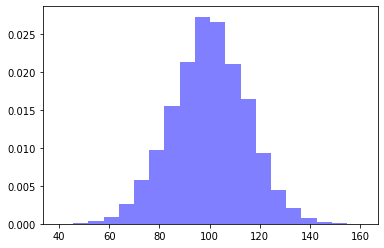

In [11]:
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()